# Model with conditional interaction

In this example, we show regional effects of a model with general interactions using PDP, ALE, and RHALE.
In particular, we:

1. show how to use `effector` to estimate the regional effects using PDP, ALE, and RHALE
2. provide the analytical formulas for the regional effects
3. test that (1) and (2) match

We will use the following model: 

$$
f_{1,2}(x_1, x_2) = x_1 x_2^2.
$$

where the features $x_1, x_2, x_3$ are independent and uniformly distributed in the interval $[-1, 1]$.


The model has an interaction between $x_1$ and $x_2$ through the term:

$$
f_{1,2}(x_1, x_2) = x_1 x_2^2.
$$

This interaction implies that the effect of $x_1$ on the output $y$ depends on the value of $x_2^2$, and vice versa. This dependency introduces heterogeneity, as the contribution of $x_1$ to the output changes with the value of $x_2$.

Each global effect method has a different formula for qunatifying such heterogeneity; below, we will see how PDP, ALE, and RHALE handles it.


In contrast, the term:

$$
f_3(x_3) = e^{x_3}
$$

does not involve any interaction with $x_1$ or $x_2$. As a result, $x_3$ has a global effect with zero heterogeneity, meaning its contribution to the output is consistent regardless of the values of other features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import effector

np.random.seed(21)

model = effector.models.GeneralInteraction()
dataset = effector.datasets.IndependentUniform(dim=3, low=-1, high=1)
x = dataset.generate_data(10000)

## PDP

### Effector

Let's see below the PDP regional effects, using `effector`.

In [6]:
regional_pdp = effector.RegionalPDP(
    data=x, 
    model=model.predict, 
    nof_instances="all"
)

regional_pdp.fit(
    features="all", 
    heter_pcg_drop_thres=0.4, 
    nof_candidate_splits_for_numerical=100, 
    split_categorical_features=True,
)
regional_pdp.show_partitioning(features="all", only_important=True)

100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 0.49 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: x_0 | x_2 <= 0.31, heter: 0.11 || nof_instances:   642 || weight: 0.64
        Node id: 2, name: x_0 | x_2  > 0.31, heter: 0.18 || nof_instances:   358 || weight: 0.36
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 0.49
        Level 1, heter: 0.13 || heter drop: 0.36 (72.79%)
Feature 1 - Full partition tree:
Node id: 0, name: x_1, heter: 0.54 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: x_1 | x_2 <= 0.29, heter: 0.16 || nof_instances:   637 || weight: 0.64
        Node id: 2, name: x_1 | x_2  > 0.29, heter: 0.25 || nof_instances:   363 || weight: 0.36
--------------------------------------------------
Feature 1 - Statistics per tree level:
Level 0, heter: 0.54
        Level 1, heter: 0.19 || heter drop: 0.35 (64.34%)
Feature 2 - Full partition tree:
Node id: 0, name: x_2, he

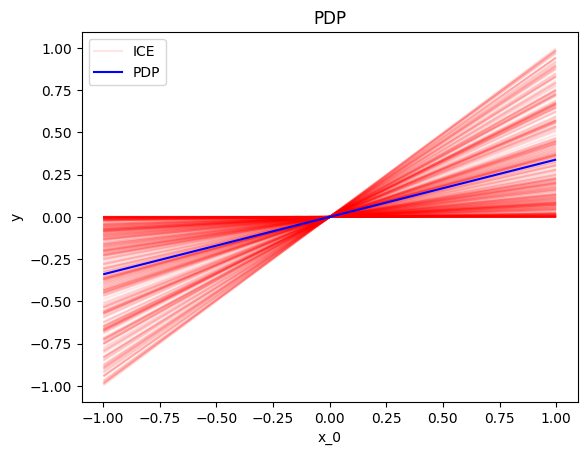

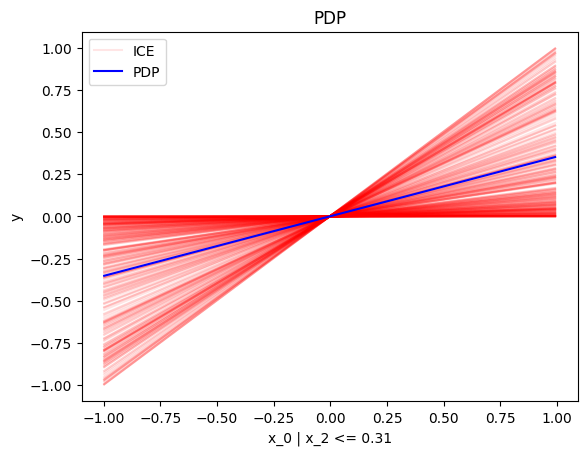

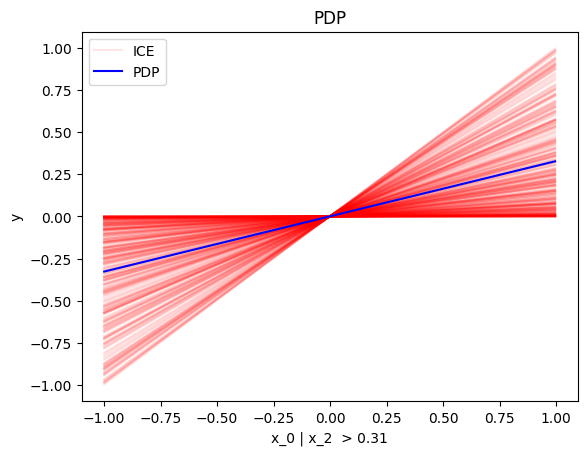

In [16]:
regional_pdp.plot(feature=0, node_idx=0, heterogeneity="ice", centering=True)
regional_pdp.plot(feature=0, node_idx=1, heterogeneity="ice", centering=True)
regional_pdp.plot(feature=0, node_idx=2, heterogeneity="ice", centering=True)

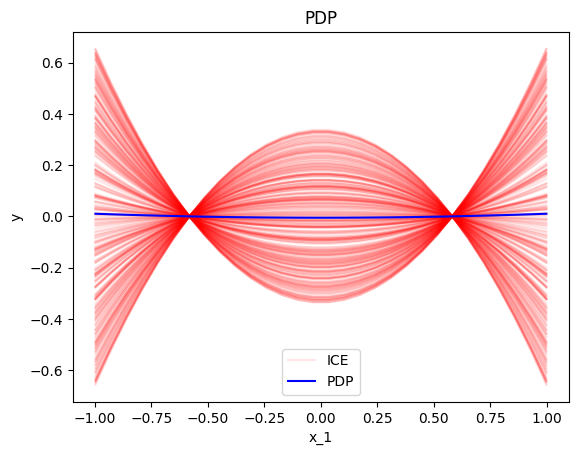

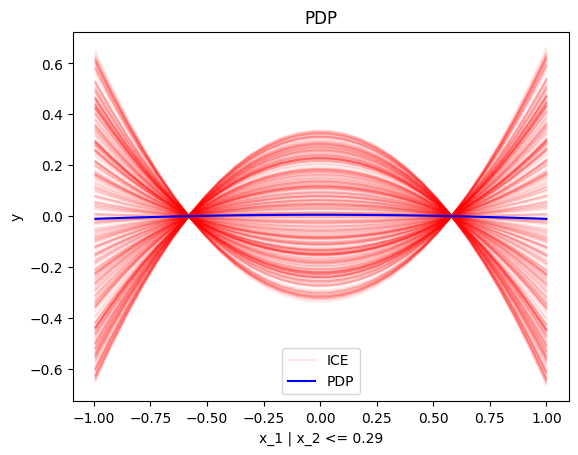

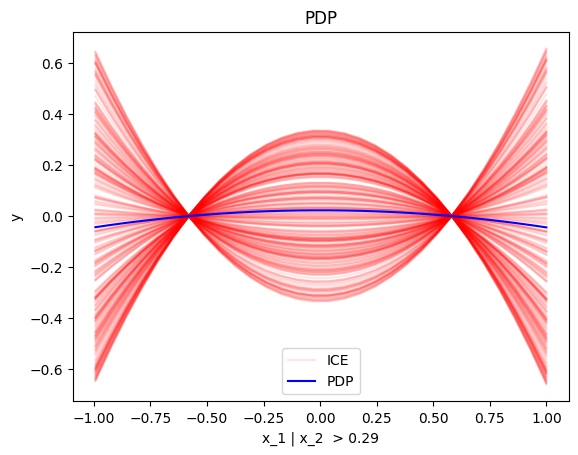

In [18]:
regional_pdp.plot(feature=1, node_idx=0, heterogeneity="ice", centering=True)
regional_pdp.plot(feature=1, node_idx=1, heterogeneity="ice", centering=True)
regional_pdp.plot(feature=1, node_idx=2, heterogeneity="ice", centering=True)

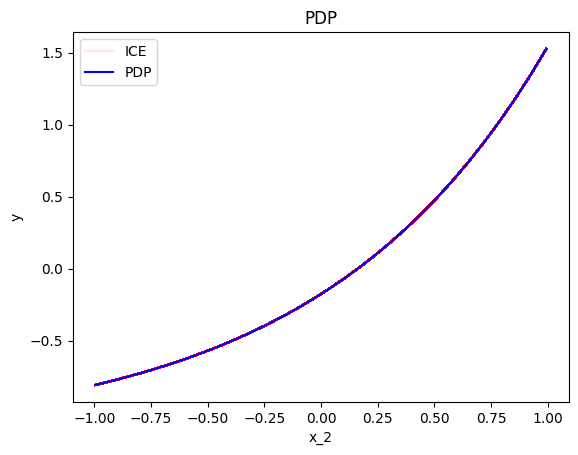

In [21]:
regional_pdp.plot(feature=2, node_idx=0, heterogeneity="ice", centering=True)

## ALE

### Effector

Let's see below the PDP effects for each feature, using `effector`.

In [35]:
# Regional RHALE
regional_ale = effector.RegionalALE(
    data=x,
    model=model.predict,
    nof_instances="all",
)

regional_ale.fit(
    features="all",
    heter_pcg_drop_thres=0.4, 
    nof_candidate_splits_for_numerical=100,
    split_categorical_features=True,
)

regional_ale.show_partitioning(features="all", only_important=True)

100%|██████████| 3/3 [00:04<00:00,  1.35s/it]

Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 0.60 || nof_instances: 10000 || weight: 1.00
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 0.60
Feature 1 - Full partition tree:
Node id: 0, name: x_1, heter: 1.15 || nof_instances: 10000 || weight: 1.00
        Node id: 1, name: x_1 | x_0 <= -0.01, heter: 0.57 || nof_instances:  4936 || weight: 0.49
        Node id: 2, name: x_1 | x_0  > -0.01, heter: 0.58 || nof_instances:  5064 || weight: 0.51
--------------------------------------------------
Feature 1 - Statistics per tree level:
Level 0, heter: 1.15
        Level 1, heter: 0.57 || heter drop: 0.57 (49.97%)
Feature 2 - Full partition tree:
Node id: 0, name: x_2, heter: 0.00 || nof_instances: 10000 || weight: 1.00
--------------------------------------------------
Feature 2 - Statistics per tree level:
Level 0, heter: 0.00


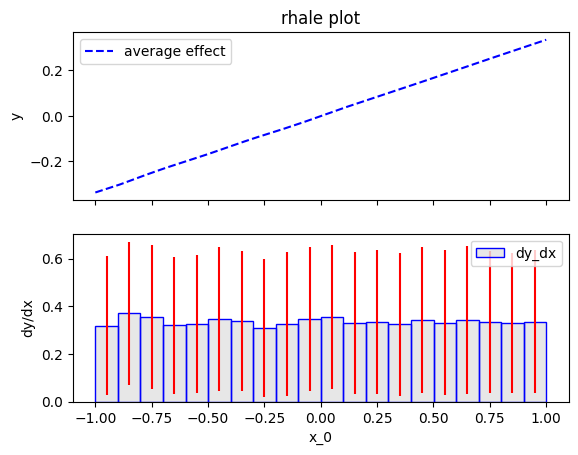

In [36]:
regional_ale.plot(feature=0, node_idx=0, heterogeneity="ice", centering=True)

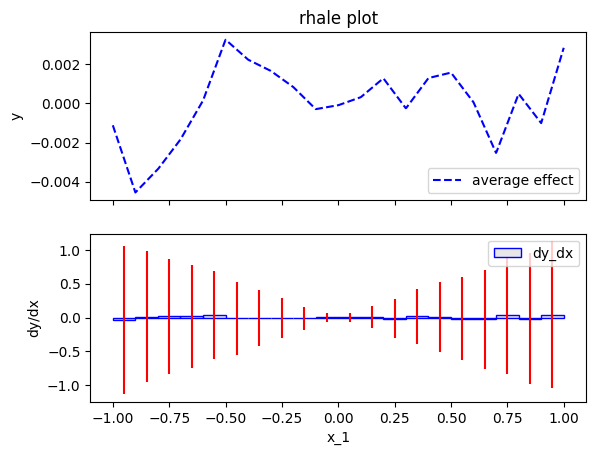

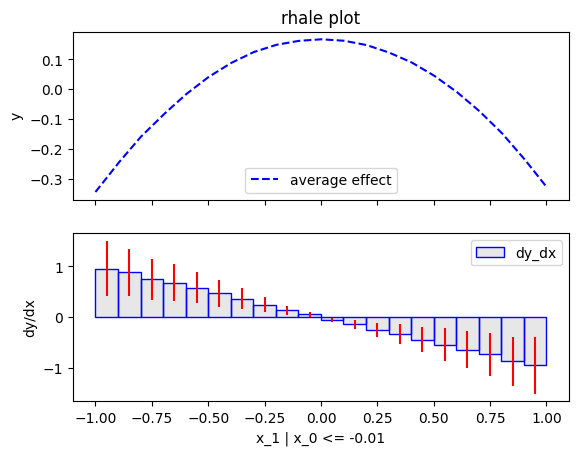

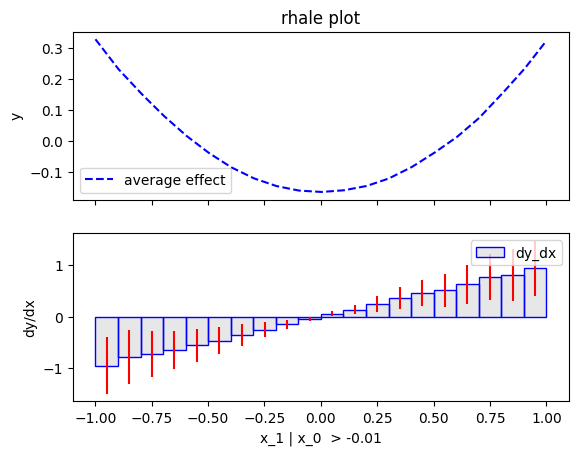

In [37]:
regional_ale.plot(feature=1, node_idx=0, heterogeneity="ice", centering=True)
regional_ale.plot(feature=1, node_idx=1, heterogeneity="ice", centering=True)
regional_ale.plot(feature=1, node_idx=2, heterogeneity="ice", centering=True)

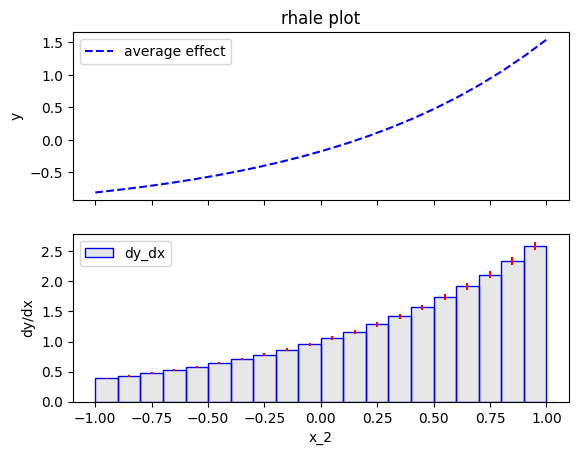

In [38]:
regional_ale.plot(feature=2, node_idx=0, heterogeneity="ice", centering=True)

## RHALE

### Effector

Let's see below the RHALE effects for each feature, using `effector`.

In [8]:
# Regional RHALE
regional_rhale = effector.RegionalRHALE(
    data=x,
    model=model.predict,
    nof_instances="all",
    model_jac=model.jacobian,
)

regional_rhale.fit(
    features="all",
    heter_pcg_drop_thres=0.4, 
    nof_candidate_splits_for_numerical=100,
    split_categorical_features=True,
    binning_method=effector.binning_methods.Greedy(init_nof_bins=100, min_points_per_bin=100, discount=1., cat_limit=10),
)

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:17<00:00,  5.68s/it]


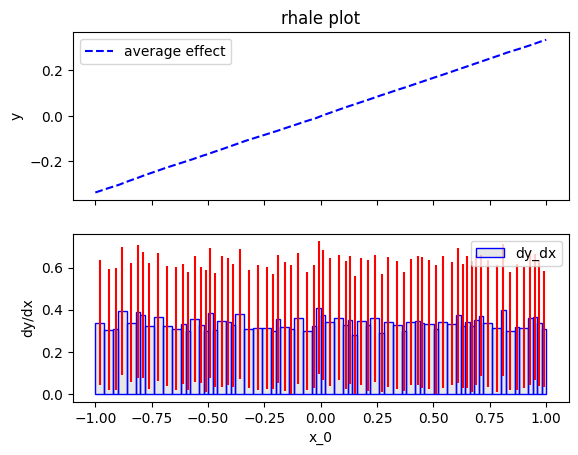

In [32]:
regional_rhale.plot(feature=0, node_idx=0, heterogeneity="ice", centering=True)

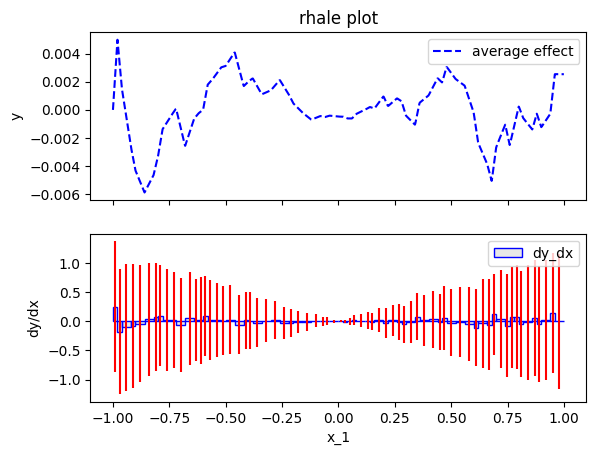

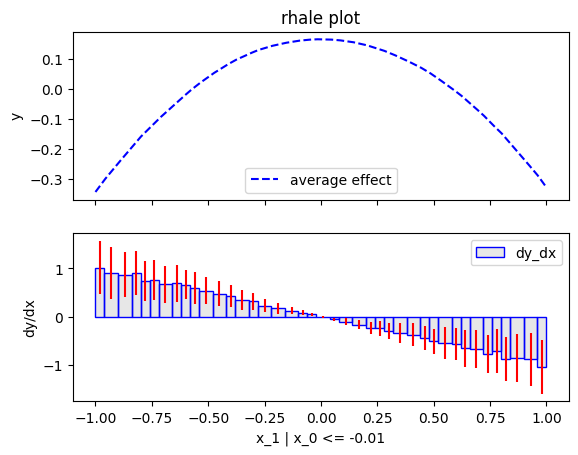

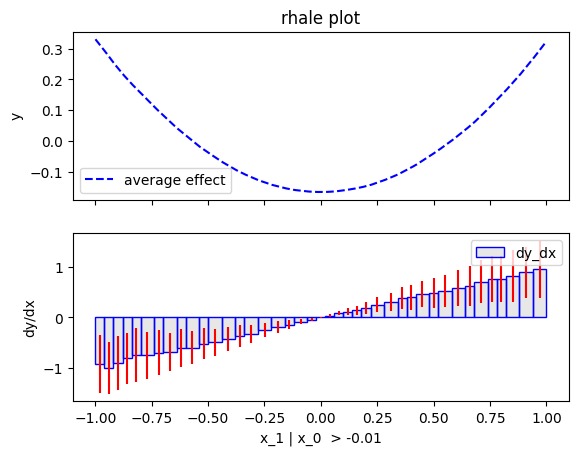

In [39]:
regional_rhale.plot(feature=1, node_idx=0, heterogeneity="ice", centering=True)
regional_rhale.plot(feature=1, node_idx=1, heterogeneity="ice", centering=True)
regional_rhale.plot(feature=1, node_idx=2, heterogeneity="ice", centering=True)

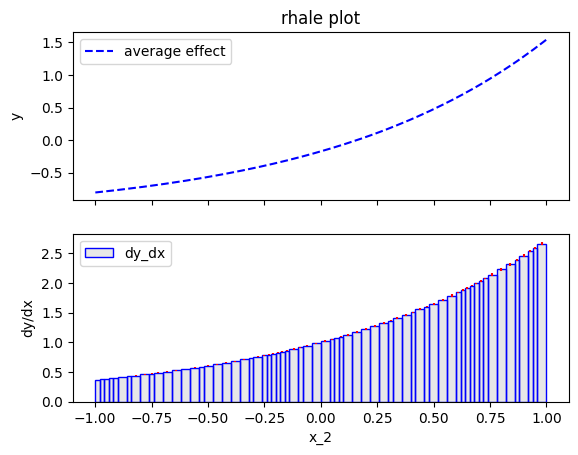

In [40]:
regional_rhale.plot(feature=2, node_idx=0, heterogeneity="ice", centering=True)